We first import the necessary modules

In [ ]:
# import the necessary modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
from scipy import stats
import statsmodels.api as sm 
import pylab as py

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We read the file using the following codes.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving state_wise_daily.csv to state_wise_daily.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['state_wise_daily.csv']))
# Dataset is now stored in a Pandas Dataframe
#select the columns and rows pertaining to confirmed cases in Tamil Nadu
data = data[["Date_YMD", "Status", "TN"]]
data = data.loc[data.Status == "Confirmed"]
# reset the index
data = data.reset_index()
# get the tototal number of cases in TN and store in column Total Confirmed
data['TN Confirmed']=data['TN']
# change the data type of date column to datetime 
data['Date'] = pd.to_datetime(data['Date_YMD'])
# select only date and total confirmed columns
data = data[["Date", "TN Confirmed"]]

# read the file
data1 = pd.read_csv(io.BytesIO(uploaded['state_wise_daily.csv']))
#select the columns and rows pertaining to confirmed cases in Tamil Nadu
data1 = data1[["Date_YMD", "Status", "TN"]]
data1 = data1.loc[data1.Status == "Deceased"]
# reset the index
data1 = data1.reset_index()
# get the tototal number of cases in TN and store in column Total Confirmed
data1['TN Deceased']=data1['TN']
# change the data type of date column to datetime 
data1['Date'] = pd.to_datetime(data1['Date_YMD'])
# select only date and total deceased columns
data1 = data1[["Date", "TN Deceased"]]

df = pd.merge(data, data1, how = 'outer', on = 'Date')


Let us inspect the data.

In [ ]:
df.head() # prints the top five rows in the dataset

,Date,TN Confirmed,TN Deceased
0,2020-03-14,1,0
1,2020-03-15,0,0
2,2020-03-16,0,0
3,2020-03-17,0,0
4,2020-03-18,1,0


In [ ]:
df.describe()

,TN Confirmed,TN Deceased
count,335.000000,335.000000
mean,2518.477612,37.020896
std,2223.865668,44.803859
min,0.000000,0.000000
25%,587.500000,6.000000
50%,1562.000000,17.000000
75%,4972.000000,65.000000
max,6993.000000,518.000000


a) For each of the two variables, draw a histogram and overlay the normal density to observe the departure if any from normality to the two variables in earlier assignment. Use kernel density approach to overlay the normal graph.

Text(0, 0.5, 'Probability density')

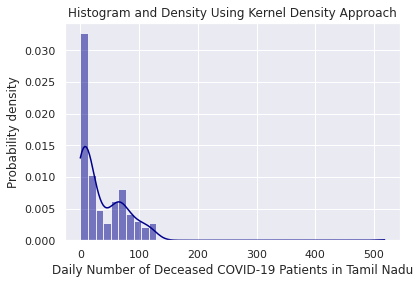

In [ ]:
sns.histplot(data = df, x = 'TN Deceased', stat = 'density', bins = 40, kde = True, color = 'darkblue')
plt.title('Histogram and Density Using Kernel Density Approach')
plt.xlabel('Daily Number of Deceased COVID-19 Patients in Tamil Nadu')
plt.ylabel('Probability density')

Text(0, 0.5, 'Probability density')

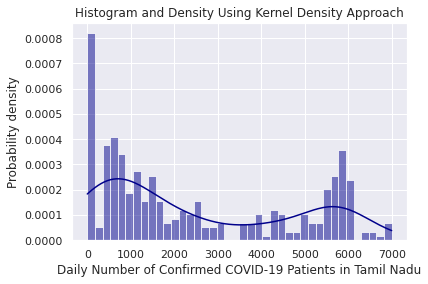

In [ ]:
sns.histplot(data = df, x = 'TN Confirmed', stat = 'density', bins = 40, kde = True, color = 'darkblue')
plt.title('Histogram and Density Using Kernel Density Approach')
plt.xlabel('Daily Number of Confirmed COVID-19 Patients in Tamil Nadu')
plt.ylabel('Probability density')

b) Draw the bivariate normality pdf and also assess the shape of the contour for normality and comment on the correlation between the two variables.

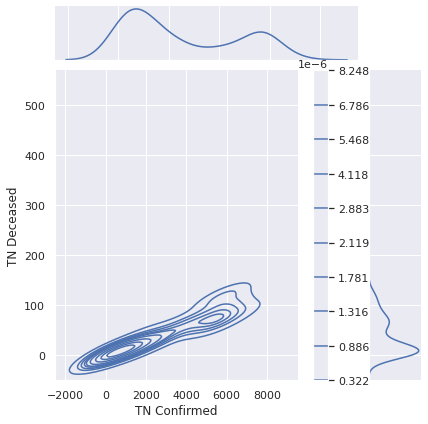

In [ ]:
sns.jointplot(data=df, x="TN Confirmed", y="TN Deceased", kind = 'kde', cbar=True)

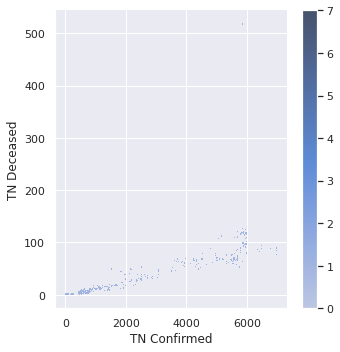

In [ ]:
sns.displot(df, x="TN Confirmed", y="TN Deceased", binwidth=(2, .5), cbar=True)

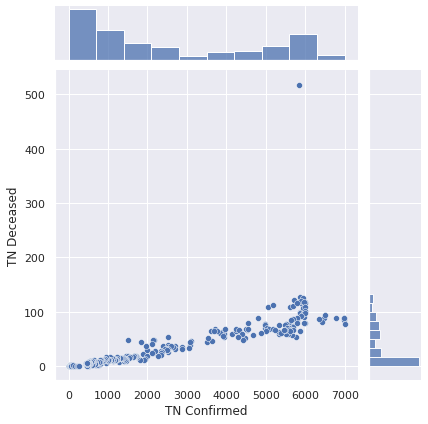

In [ ]:
sns.jointplot(data=df, x="TN Confirmed", y="TN Deceased")

c) Use approach (2) of the S4_1..pdf to check if the two variables are normally distributed.

In [ ]:
std1 = df['TN Confirmed'].between(2518.477612 - 2223.865668, 2518.477612 + 2223.865668)

In [ ]:
std1.sum()

197

In [ ]:
 197/335

0.5880597014925373

In [ ]:
P # less than 0.68

0.9880597014925373

In [ ]:
std2 = df['TN Confirmed'].between(2518.477612 - 2*2223.865668, 2518.477612 + 2*2223.865668)
std2.sum()

331

In [ ]:
 331/335

0.9880597014925373

In [ ]:
P

0.9880597014925373

In [ ]:
std = df['TN Deceased'].between(37.020896 - 2*44.803859, 37.020896 + 2*44.803859)
std.sum()

333

In [ ]:
333/335

0.9940298507462687

(d) Use the Q-Q plot approach (approach 3 in S4_1…pdf) for each of the variables and verify further the departure if any from normality.

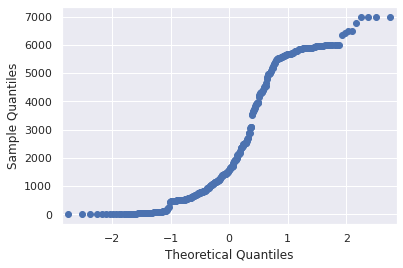

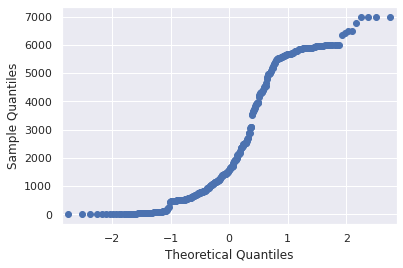

In [ ]:
sm.qqplot(df['TN Confirmed'])

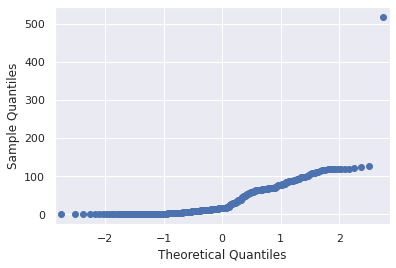

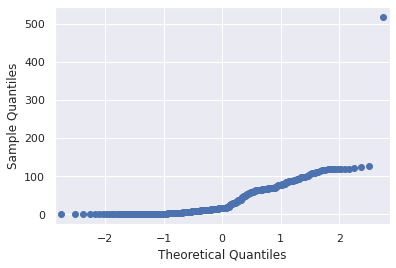

In [ ]:
sm.qqplot(df['TN Deceased'])

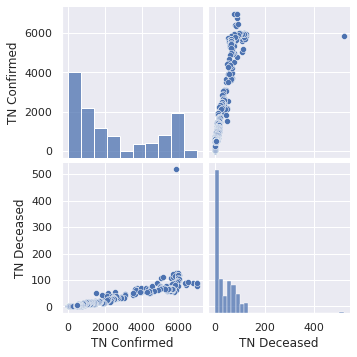

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,TN Confirmed,TN Deceased
TN Confirmed,1.000000,0.816819
TN Deceased,0.816819,1.000000
